In [ ]:
#@title Build a CNN model for Bird species

In [ ]:
#Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, shear_range=0.2) 
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/drive/MyDrive/train_data/train_data',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)

test = test_gen.flow_from_directory('/content/drive/MyDrive/test_data/test_data',
                                    target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
#Building the CNN model

from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

#Adding CNN Layers
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#Building ANN from here
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))


In [ ]:
#Compiling the model

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 118, 118, 20)      560       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 59, 59, 20)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 69620)             0         
                                                                 
 dense_17 (Dense)            (None, 45)                3132945   
                                                                 
 dense_18 (Dense)            (None, 16)                736       
                                                                 
Total params: 3,134,241
Trainable params: 3,134,241
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 116s 6s/step - loss: 4.3850 - accuracy: 0.0733 - val_loss: 2.8194 - val_accuracy: 0.1465
Epoch 2/10
19/19 [==============================] - 129s 7s/step - loss: 2.7154 - accuracy: 0.1333 - val_loss: 2.8232 - val_accuracy: 0.1210
Epoch 3/10
19/19 [==============================] - 130s 7s/step - loss: 2.5324 - accuracy: 0.1333 - val_loss: 2.8714 - val_accuracy: 0.0892
Epoch 4/10
19/19 [==============================] - 117s 6s/step - loss: 2.4021 - accuracy: 0.2000 - val_loss: 2.8397 - val_accuracy: 0.1656
Epoch 5/10
19/19 [==============================] - 138s 8s/step - loss: 2.2583 - accuracy: 0.2667 - val_loss: 2.8454 - val_accuracy: 0.1274
Epoch 6/10
19/19 [==============================] - 134s 7s/step - loss: 2.0473 - accuracy: 0.2867 - val_loss: 2.8763 - val_accuracy: 0.2038
Epoch 7/10
19/19 [==============================] - 134s 7s/step - loss: 1.9058 - accuracy: 0.3467 - val_loss: 2.9594 - val_accuracy: 0.1720
Epoch 8/10
19

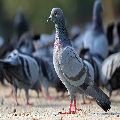

In [ ]:
#Testing the model

import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Pegion.jpg',target_size=(120,120))
img

In [ ]:
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img

array([[[[ 44.,  56.,  42.],
         [ 53.,  64.,  48.],
         [ 60.,  72.,  52.],
         ...,
         [ 56.,  63.,  45.],
         [ 51.,  60.,  41.],
         [ 48.,  55.,  39.]],

        [[ 41.,  55.,  40.],
         [ 47.,  61.,  44.],
         [ 57.,  70.,  50.],
         ...,
         [ 54.,  63.,  44.],
         [ 50.,  59.,  40.],
         [ 44.,  53.,  36.]],

        [[ 41.,  53.,  41.],
         [ 45.,  59.,  44.],
         [ 56.,  69.,  51.],
         ...,
         [ 53.,  57.,  42.],
         [ 48.,  55.,  39.],
         [ 43.,  49.,  35.]],

        ...,

        [[142., 118.,  70.],
         [235., 220., 197.],
         [212., 178., 151.],
         ...,
         [231., 230., 226.],
         [235., 233., 220.],
         [234., 232., 219.]],

        [[234., 233., 229.],
         [246., 238., 235.],
         [241., 241., 239.],
         ...,
         [221., 211., 201.],
         [225., 217., 204.],
         [233., 219., 192.]],

        [[222., 219., 212.],
       

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 121ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
pred = np.argmax(model.predict(img))

1/1 [==============================] - 0s 40ms/step


In [ ]:
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

'hsparo'

In [ ]:
#Training 1
img1 = image.load_img('/content/An condor.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
8


'himgri'

In [ ]:
#testing 2
img1 = image.load_img('/content/Common Myna.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 41ms/step
0


'blasti'

In [ ]:
#Training 3
img1 = image.load_img('/content/Cinereous tit.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 31ms/step
7


'himbul'

In [ ]:
#Training 4
img1 = image.load_img('/content/Bellied Rock Thrush.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 46ms/step
7


'himbul'

In [ ]:
#Training 5
img1 = image.load_img('/content/Crow.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 28ms/step
9


'hsparo'

In [ ]:
#Training 6
img1 = image.load_img('/content/Himalayan Bulbul.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 39ms/step
0


'blasti'

In [ ]:
#Training 7
img1 = image.load_img('/content/Kyte.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 32ms/step
8


'himgri'

In [ ]:
#Training 8
img1 = image.load_img('/content/Magpie.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 30ms/step
9


'hsparo'

In [ ]:
#Training 9
img1 = image.load_img('/content/OWL.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 27ms/step
7


'himbul'

In [ ]:
#Training 10
img1 = image.load_img('/content/Pegion.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 26ms/step
9


'hsparo'

In [ ]:
#Training 11
img1 = image.load_img('/content/Vulture.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 25ms/step
8


'himgri'

In [ ]:
#Training 12
img1 = image.load_img('/content/avocet.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 27ms/step
9


'hsparo'

In [ ]:
#Training 13
img1 = image.load_img('/content/eagle.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 41ms/step
8


'himgri'

In [ ]:
#Training 14
img1 = image.load_img('/content/red-blue-magpie.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 28ms/step
7


'himbul'

In [ ]:
#Training 15
img1 = image.load_img('/content/white-capped-redstart.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
0


'blasti'

In [ ]:
#Training 16
img1 = image.load_img('/content/sparrow.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 44ms/step
9


'hsparo'

In [ ]:
##As we are getting wrong output, we will tune the model by adding more layers

In [ ]:
#@title Model tuning

model = Sequential()

#Adding CNN Layers
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(24,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(36,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#Building ANN from here
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
#model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 59, 59, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 28, 28, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 36)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=50)

Epoch 1/50
19/19 [==============================] - 130s 7s/step - loss: 2.7188 - accuracy: 0.1533 - val_loss: 2.6932 - val_accuracy: 0.2102
Epoch 2/50
19/19 [==============================] - 136s 7s/step - loss: 2.5300 - accuracy: 0.2333 - val_loss: 2.6903 - val_accuracy: 0.2038
Epoch 3/50
19/19 [==============================] - 137s 8s/step - loss: 2.3663 - accuracy: 0.2667 - val_loss: 2.6762 - val_accuracy: 0.1911
Epoch 4/50
19/19 [==============================] - 129s 7s/step - loss: 2.4333 - accuracy: 0.2800 - val_loss: 2.6627 - val_accuracy: 0.1401
Epoch 5/50
19/19 [==============================] - 129s 7s/step - loss: 2.2542 - accuracy: 0.3067 - val_loss: 2.6770 - val_accuracy: 0.1592
Epoch 6/50
19/19 [==============================] - 128s 7s/step - loss: 2.1391 - accuracy: 0.3467 - val_loss: 2.6107 - val_accuracy: 0.1975
Epoch 7/50
19/19 [==============================] - 128s 7s/step - loss: 1.9498 - accuracy: 0.3000 - val_loss: 2.8910 - val_accuracy: 0.2038
Epoch 8/50
19

In [ ]:
#Training 1
img1 = image.load_img('/content/An condor.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 180ms/step
4


'cmnmyn'

In [ ]:
#Training 2
img1 = image.load_img('/content/Bellied Rock Thrush.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 28ms/step
5


'gretit'

In [ ]:
#Training 3
img1 = image.load_img('/content/Cinereous tit.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
5


'gretit'

In [ ]:
#Training 4
img1 = image.load_img('/content/Common Myna.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 39ms/step
5


'gretit'

In [ ]:
#Training 5
img1 = image.load_img('/content/Pegion.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 27ms/step
6


'hilpig'

In [ ]:
#Training 6
img1 = image.load_img('/content/Himalayan Bulbul.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 36ms/step
0


'blasti'

In [ ]:
#Training 7
img1 = image.load_img('/content/Kyte.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 26ms/step
4


'cmnmyn'

In [ ]:
#Training 8
img1 = image.load_img('/content/Magpie.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 27ms/step
2


'brhkyt'

In [ ]:
#Training 9
img1 = image.load_img('/content/OWL.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 25ms/step
5


'gretit'

In [ ]:
#Training 10
img1 = image.load_img('/content/Pegion.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 37ms/step
7


'himbul'

In [ ]:
#Training 11
img1 = image.load_img('/content/avocet.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 25ms/step
4


'cmnmyn'

In [ ]:
#Training 12
img1 = image.load_img('/content/vulture.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
10


'indvul'

In [ ]:
#Training 13
img1 = image.load_img('/content/eagle.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 39ms/step
4


'cmnmyn'

In [ ]:
#Training 14
img1 = image.load_img('/content/red-blue-magpie.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
3


'cbrtsh'

In [ ]:
#Training 15
img1 = image.load_img('/content/sparrow.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 38ms/step
5


'gretit'

In [ ]:
#@title Model tuning (with dropout, batch normalizationm and early stop)
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

#Adding CNN Layers
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(24,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
#Building ANN from here
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
#model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 118, 118, 12)      336       
                                                                 
 batch_normalization_4 (Batc  (None, 118, 118, 12)     48        
 hNormalization)                                                 
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 59, 59, 12)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 59, 59, 12)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 57, 57, 24)        2616      
                                                                 
 batch_normalization_5 (Batc  (None, 57, 57, 24)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Early Stop

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience=8)

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=50, callbacks=early_stop)

Epoch 1/50
19/19 [==============================] - 136s 7s/step - loss: 2.8230 - accuracy: 0.1667 - val_loss: 2.8177 - val_accuracy: 0.1210
Epoch 2/50
19/19 [==============================] - 133s 7s/step - loss: 2.2873 - accuracy: 0.3133 - val_loss: 3.2802 - val_accuracy: 0.0764
Epoch 3/50
19/19 [==============================] - 107s 6s/step - loss: 2.0045 - accuracy: 0.4533 - val_loss: 3.7691 - val_accuracy: 0.0382
Epoch 4/50
19/19 [==============================] - 108s 6s/step - loss: 1.9589 - accuracy: 0.4467 - val_loss: 4.1699 - val_accuracy: 0.0382
Epoch 5/50
19/19 [==============================] - 128s 7s/step - loss: 1.8512 - accuracy: 0.4600 - val_loss: 4.5910 - val_accuracy: 0.0382
Epoch 6/50
19/19 [==============================] - 108s 6s/step - loss: 1.6538 - accuracy: 0.5867 - val_loss: 5.2828 - val_accuracy: 0.0382
Epoch 7/50
19/19 [==============================] - 129s 7s/step - loss: 1.5894 - accuracy: 0.5600 - val_loss: 5.1038 - val_accuracy: 0.0382
Epoch 8/50
19

In [ ]:
#Training 1
img1 = image.load_img('/content/An condor.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 247ms/step
4


'cmnmyn'

In [ ]:
#Training 2
img1 = image.load_img('/content/Bellied Rock Thrush.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 31ms/step
14


'rebimg'

In [ ]:
#Training 3
img1 = image.load_img('/content/Cinereous tit.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 46ms/step
14


'rebimg'

In [ ]:
#Training 4
img1 = image.load_img('/content/Common Myna.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 33ms/step
14


'rebimg'

In [ ]:
#Training 5
img1 = image.load_img('/content/Crow.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
4


'cmnmyn'

In [ ]:
#Training 6
img1 = image.load_img('/content/Himalayan Bulbul.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 45ms/step
4


'cmnmyn'

In [ ]:
#Training 7
img1 = image.load_img('/content/Kyte.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 28ms/step
4


'cmnmyn'

In [ ]:
#Training 8
img1 = image.load_img('/content/Magpie.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 39ms/step
4


'cmnmyn'

In [ ]:
#Training 9
img1 = image.load_img('/content/OWL.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 52ms/step
4


'cmnmyn'

In [ ]:
#Training 10
img1 = image.load_img('/content/Pegion.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
4


'cmnmyn'

In [ ]:
#Training 11
img1 = image.load_img('/content/Vulture.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 40ms/step
4


'cmnmyn'

In [ ]:
#Training 12
img1 = image.load_img('/content/avocet.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 29ms/step
4


'cmnmyn'

In [ ]:
#Training 13
img1 = image.load_img('/content/eagle.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 45ms/step
4


'cmnmyn'

In [ ]:
#Training 14
img1 = image.load_img('/content/red-blue-magpie.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 33ms/step
4


'cmnmyn'

In [ ]:
#Training 15
img1 = image.load_img('/content/sparrow.jpg', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 33ms/step
14


'rebimg'

In [ ]:
#Training 16
img1 = image.load_img('/content/white-capped-redstart.jfif', target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
output[pred]

1/1 [==============================] - 0s 27ms/step
4


'cmnmyn'